In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

In [157]:
#read the dataset
data=pd.read_csv('data.csv')

In [158]:
#shape of the dataset
shape=data.shape
print('Shape of the data set:', shape)

Shape of the data set: (2200, 8)


In [159]:
#head of the dataset
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [160]:
#check for missing values
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [161]:
#crops present in the dataset
data['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [162]:
#average values
print("Average Ratio of Nitrogen in the soil: {:.2f}".format(data['N'].mean()))
print("Average Ratio of Phosphorus in the soil: {:.2f}".format(data['P'].mean()))
print("Average Ratio of Potassium in the soil: {:.2f}".format(data['K'].mean()))
print("Average Temperature in Celsius: {:.2f}".format(data['temperature'].mean()))
print("Average Humidity in %: {:.2f}".format(data['humidity'].mean()))
print("Average pH value: {:.2f}".format(data['ph'].mean()))
print("Average Rainfall in mm: {:.2f}".format(data['rainfall'].mean()))

Average Ratio of Nitrogen in the soil: 50.55
Average Ratio of Phosphorus in the soil: 53.36
Average Ratio of Potassium in the soil: 48.15
Average Temperature in Celsius: 25.62
Average Humidity in %: 71.48
Average pH value: 6.47
Average Rainfall in mm: 103.46


In [163]:
@interact
def summary(crops = list(data['label'].value_counts().index)):
    x = data[data['label']== crops]
    z = data.drop(['label'],axis=1)
    for i in z.columns:
        print(f'Minimum {i} required: {x[i].min():.2f}')
        print(f'Average {i} required: {x[i].mean():.2f}')
        print(f'Maximum {i} required: {x[i].max():.2f}')
        print('--------------------------------------------------')

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [164]:
@interact
def compare(condition=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']):
    # Calculate the average requirement for each crop for the selected condition
    avg_requirements = data.groupby('label')[condition].mean()
    
    # Display the crops and their average requirements for the selected condition
    print(f"Average {condition} requirement for each crop:")
    print('--------------------------------------------------')
    for crop, avg in avg_requirements.items():
        print(f"{crop}: {avg:.2f}")
    print('--------------------------------------------------')


interactive(children=(Dropdown(description='condition', options=('N', 'P', 'K', 'temperature', 'humidity', 'ph…

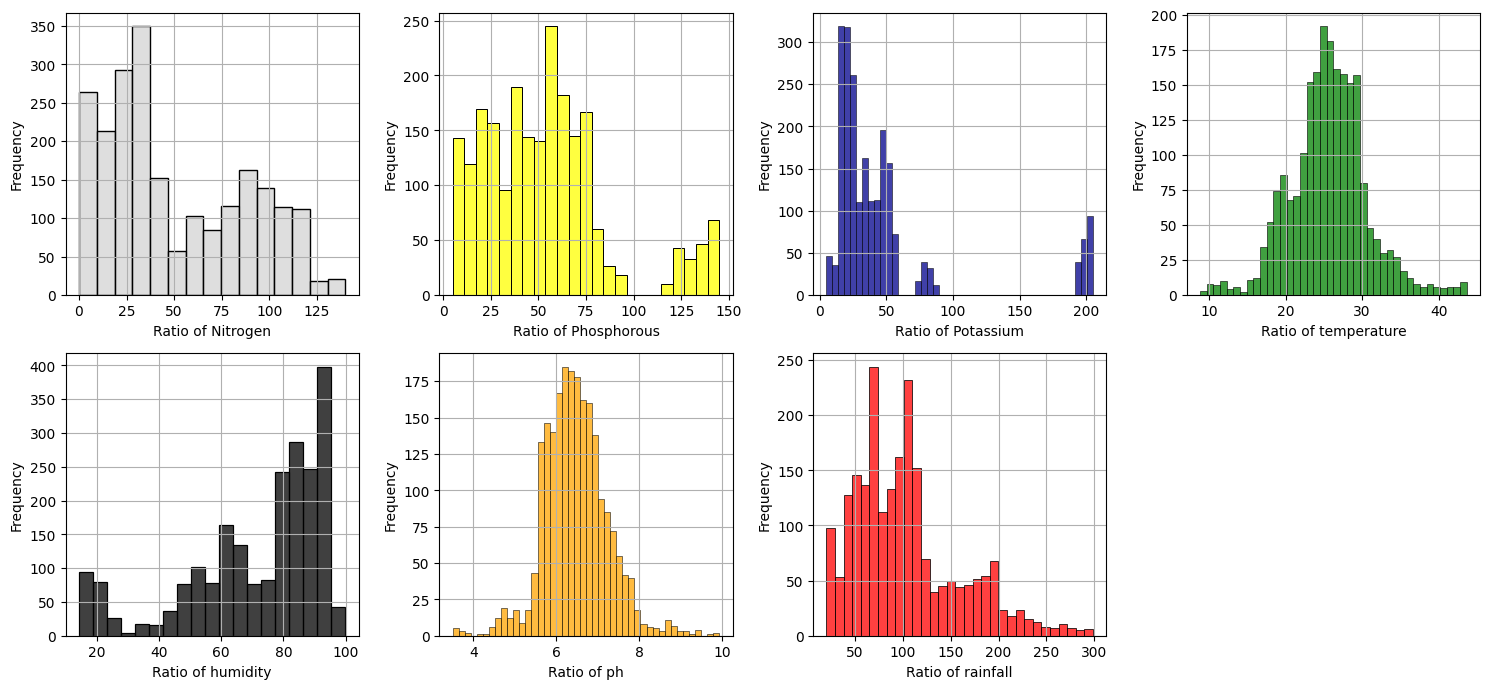

In [165]:
#distribution of conditions

plt.rcParams['figure.figsize']=(15, 7)
    
# Plot distribution
plt.subplot(2,4,1)
sns.histplot(data['N'], color='lightgrey')
plt.xlabel('Ratio of Nitrogen')
plt.ylabel('Frequency')
plt.grid()

plt.subplot(2,4,2)
sns.histplot(data['P'], color='yellow')
plt.xlabel('Ratio of Phosphorous')
plt.ylabel('Frequency')
plt.grid()

plt.subplot(2,4,3)
sns.histplot(data['K'], color='darkblue')
plt.xlabel('Ratio of Potassium')
plt.ylabel('Frequency')
plt.grid()

plt.subplot(2,4,4)
sns.histplot(data['temperature'], color='green')
plt.xlabel('Ratio of temperature')
plt.ylabel('Frequency')
plt.grid()

plt.subplot(2,4,5)
sns.histplot(data['humidity'], color='black')
plt.xlabel('Ratio of humidity')
plt.ylabel('Frequency')
plt.grid()

plt.subplot(2,4,6)
sns.histplot(data['ph'], color='orange')
plt.xlabel('Ratio of ph')
plt.ylabel('Frequency')
plt.grid()

plt.subplot(2,4,7)
sns.histplot(data['rainfall'], color='red')
plt.xlabel('Ratio of rainfall')
plt.ylabel('Frequency')
plt.grid()

plt.tight_layout()
plt.show()


In [166]:

# Find crops with very high or low requirements
print('Crops which require a very high ratio of Nitrogen content in soil:', 
      data[data['N'] > 120]['label'].unique())
print('Crops which require a very high ratio of Phosphorous content in soil:', 
      data[data['P'] > 100]['label'].unique())
print('Crops which require a very high ratio of Potassium content in soil:', 
      data[data['K'] > 200]['label'].unique())
print('Crops which require very high rainfall:', 
      data[data['rainfall'] > 200]['label'].unique())
print('Crops which require a very low temperature:', 
      data[data['temperature'] < 10]['label'].unique())
print('Crops which require a very high temperature:', 
      data[data['temperature'] > 40]['label'].unique())
print('Crops which require very low humidity:', 
      data[data['humidity'] < 20]['label'].unique())
print('Crops which require a very low pH:', 
      data[data['ph'] < 4]['label'].unique())
print('Crops which require a very high pH:', 
      data[data['ph'] > 9]['label'].unique())


Crops which require a very high ratio of Nitrogen content in soil: ['cotton']
Crops which require a very high ratio of Phosphorous content in soil: ['grapes' 'apple']
Crops which require a very high ratio of Potassium content in soil: ['grapes' 'apple']
Crops which require very high rainfall: ['rice' 'papaya' 'coconut']
Crops which require a very low temperature: ['grapes']
Crops which require a very high temperature: ['grapes' 'papaya']
Crops which require very low humidity: ['chickpea' 'kidneybeans']
Crops which require a very low pH: ['mothbeans']
Crops which require a very high pH: ['mothbeans']


In [167]:
print('Summer Crops:', data[(data['temperature']>30) & (data['humidity']>50)]['label'].unique())
print('Winter Crops:', data[(data['temperature']<20) & (data['humidity']>30)]['label'].unique())
print('Rainy Crops:', data[(data['rainfall']>200) & (data['humidity']>30)]['label'].unique())

Summer Crops: ['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
Winter Crops: ['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
Rainy Crops: ['rice' 'papaya' 'coconut']


In [168]:
#clustering analysis
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

x = data.drop(['label'],axis=1)
x = data.loc[:,x.columns].values
x_data = pd.DataFrame(x)
x_data.head()

,0,1,2,3,4,5,6
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340


<function matplotlib.pyplot.show(close=None, block=None)>

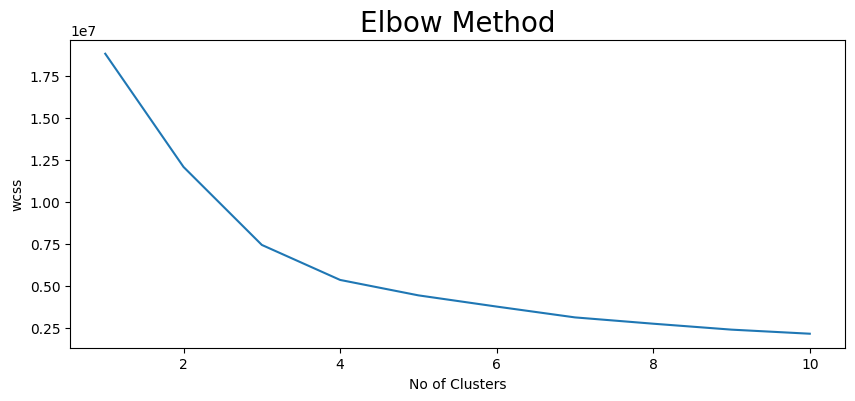

In [169]:
plt.rcParams['figure.figsize'] = (10,4)

wcss = []
for i in range(1,11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 2000, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
#Plotting the results

plt.plot(range(1,11), wcss)
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('No of Clusters')
plt.ylabel('wcss')
plt.show


In [170]:
km = KMeans(n_clusters =4, init= 'k-means++', max_iter=300, n_init=10, random_state=0)
y_means= km.fit_predict(x)

a = data['label']
y_means = pd.DataFrame(y_means)
w = pd.concat([y_means, a], axis=1)
w =w.rename(columns= {0:'cluster'})

for i in range(0,4): #for 4 clusters 0,1,2,3
    print('Crops in cluster', i+1, w[w['cluster']==i]['label'].unique())
    print('--------------------------------------------------------------------')

Crops is cluster 1 ['grapes' 'apple']
--------------------------------------------------------------------
Crops is cluster 2 ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
--------------------------------------------------------------------
Crops is cluster 3 ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
--------------------------------------------------------------------
Crops is cluster 4 ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
--------------------------------------------------------------------


In [171]:
# split the dataset
y=data['label']
x=data.drop(['label'],axis=1)

print('Shape of x:',x.shape)
print('Shape of y:',y.shape)

Shape of x: (2200, 7)
Shape of y: (2200,)


In [172]:
#Train-Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print('Shape of train x:',x_train.shape)
print('Shape of test x:',x_test.shape)
print('Shape of train y:',y_train.shape)
print('Shape of test y:',y_test.shape)

Shape of train x: (1760, 7)
Shape of test x: (440, 7)
Shape of train y: (1760,)
Shape of test y: (440,)


In [173]:
# create predictive model
from sklearn.linear_model import LogisticRegression

model= LogisticRegression()
model.fit(x_train, y_train)

# prediction variable
y_pred=model.predict(x_test)

In [174]:
# evaluate model performace
from sklearn.metrics import classification_report
cr= classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [175]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [176]:
# Take user input
N = float(input("Enter the Nitrogen content in the soil: "))
P = float(input("Enter the Phosphorus content in the soil: "))
K = float(input("Enter the Potassium content in the soil: "))
temperature = float(input("Enter the temperature in Celsius: "))
humidity = float(input("Enter the humidity in percentage: "))
ph = float(input("Enter the pH value of the soil: "))
rainfall = float(input("Enter the rainfall in mm: "))

# Prepare input data for prediction as a NumPy array
user_input = np.array([[N, P, K, temperature, humidity, ph, rainfall]])

# Predict the crop
prediction = model.predict(user_input)
print("The Suggested Crop for given climatic condition is :",prediction)

Enter the Nitrogen content in the soil:  75
Enter the Phosphorus content in the soil:  75
Enter the Potassium content in the soil:  64
Enter the temperature in Celsius:  47
Enter the humidity in percentage:  77
Enter the pH value of the soil:  4
Enter the rainfall in mm:  77


The Suggested Crop for given climatic condition is : ['papaya']
